# AR(1)

The autoregressive model of order 1, denoted by $\text{AR}(1)$, random process is defined by,

$
\begin{align}
X_t=\varphi X_{t-1} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

For  $\text{AR}(1)$ can be shown that in the limit $t \rightarrow \infty$ with $\lvert \varphi \rvert < 1,$

$
\begin{align}
&\lim_{t \to \infty} \text{E}[X_t] = 0 \\
&\lim_{t \to \infty} \text{E}[X_t^2] = \frac{\sigma^2}{1-\varphi^2} \\
&\lim_{t \to \infty} \text{E}[X_t X_{t+n}] = \varphi^n \sigma^2
\end{align}
$

where $n>0$.The autocorrelation function, $\rho_\tau$, is defined by,

$
\begin{align}
\rho_{\tau} = \frac{\text{E}[X_t X_{t+\tau}]}{\sigma^2} = \varphi^{\tau}
\end{align}
$

Convergence of $\rho_{\tau}$ as $\tau \to \infty$ requires that $\lvert \varphi \rvert < 1$.

### Relation to $\text{MA}(\infty)$
AR(1) is related to $\text{MA}(\infty)$. To see this consider,

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the lag operator,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It follows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$ with $\vartheta_i = \varphi^i$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0

def ac_plot(φ, σ, nsample, nsim, nlags):
    dfs = DataSource.create_ensemble(SourceType.AR, nsim, φ=[φ], σ=σ, npts=nsample)
    ac = DataFunc.apply_func_type_to_ensemble(dfs, DataType.ACF, nlags=nlags)
    df = DataFunc.apply_func_type(ac, DataType.AR1_ACF, φ=φ, nlags=nlags)
    fpoints(df, data_type=DataType.ACF, func_type=DataType.AR1_ACF)
    
def comparison_plot(φ_vals, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR, *params)
    stack(scan, ylim=[-7.5, 7.5], title=title, labels=labels, data_type=DataType.TIME_SERIES)

def cumu_mean_plot(φ, σ, nsample):
    ar = DataSource.create_source_type(SourceType.AR, φ=[φ], σ=σ, npts=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_MEAN)
    ar = DataFunc.apply_func_type(ar, DataType.ARMA_MEAN)
    fcurve(ar, data_type=DataType.CUMU_MEAN, func_type=DataType.ARMA_MEAN, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, nsample):
    ar = DataSource.create_source_type(SourceType.AR, φ=[φ], σ=σ, npts=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_SD)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_SD, φ=φ, σ=σ)
    fcurve(ar, data_type=DataType.CUMU_SD, func_type=DataType.AR1_SD, title_offset=1.025, plot_type=PlotType.XLOG)

## Simulation $\varphi$ Scan 

In [3]:
nsample = 1000

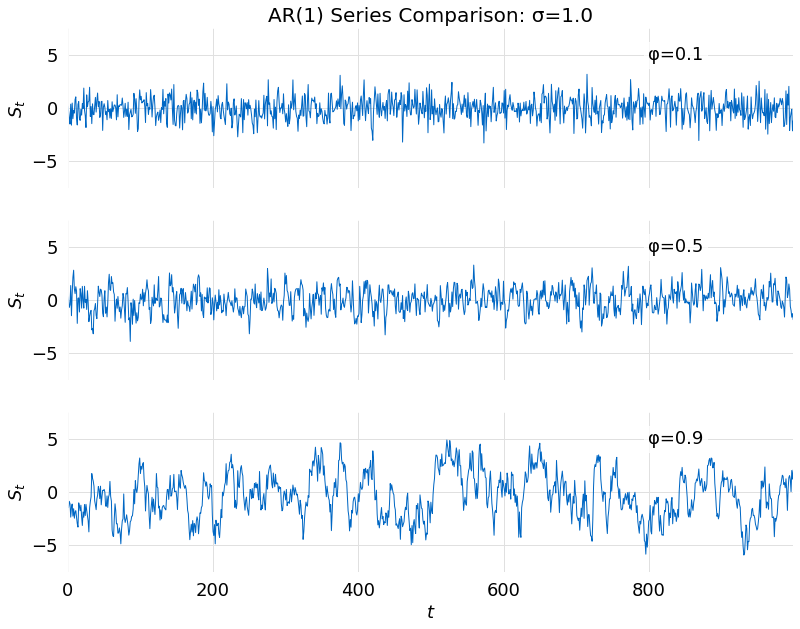

In [4]:
title = f"AR(1) Series Comparison: σ={σ}"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "npts": nsample} for φ in φ_vals]
comparison_plot(φ_vals, title, *params)

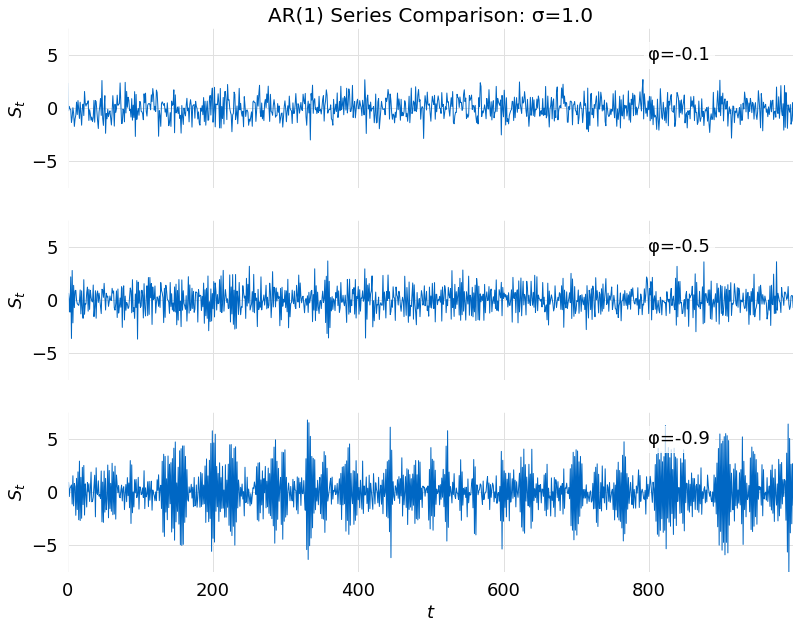

In [5]:
title = f"AR(1) Series Comparison: σ={σ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "npts": nsample} for φ in φ_vals]
comparison_plot(φ_vals, title, *params)

## Mean

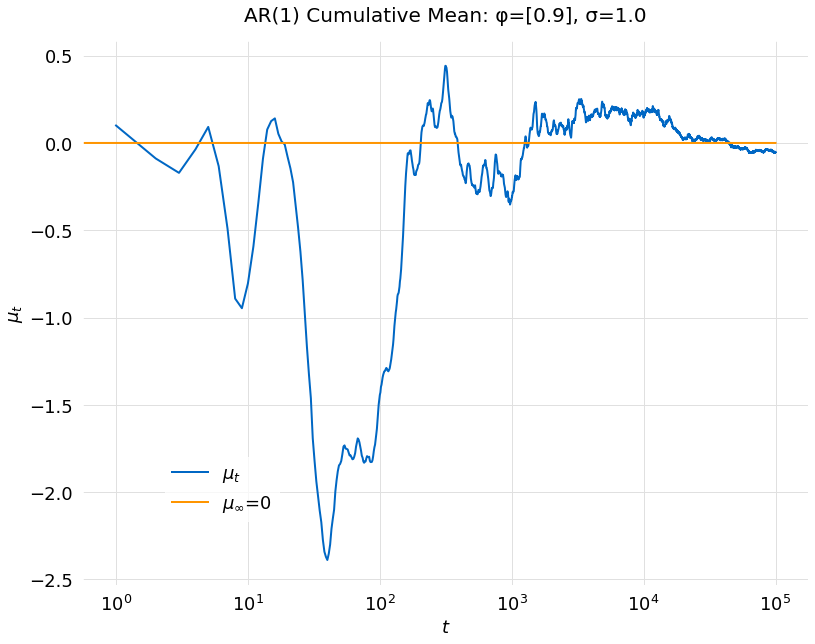

In [6]:
φ = 0.9
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

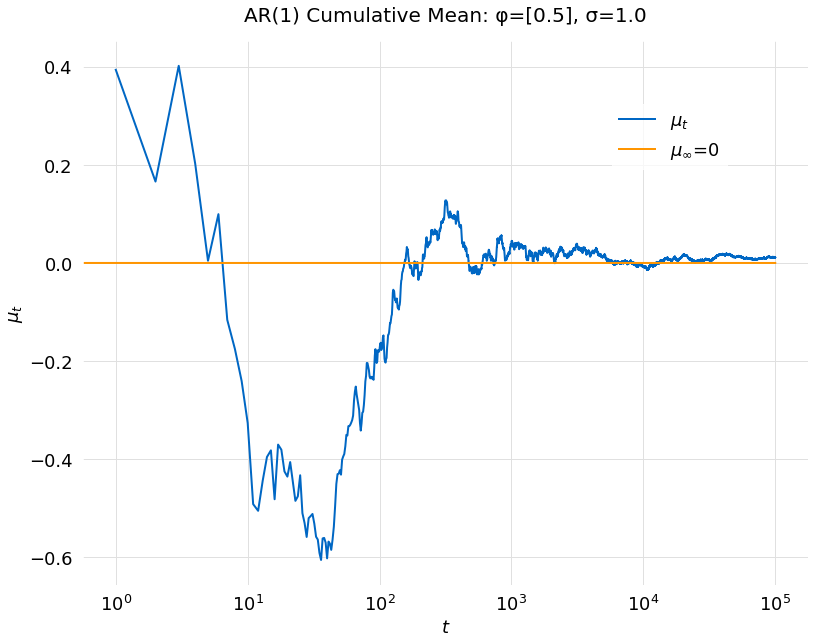

In [7]:
φ = 0.5
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

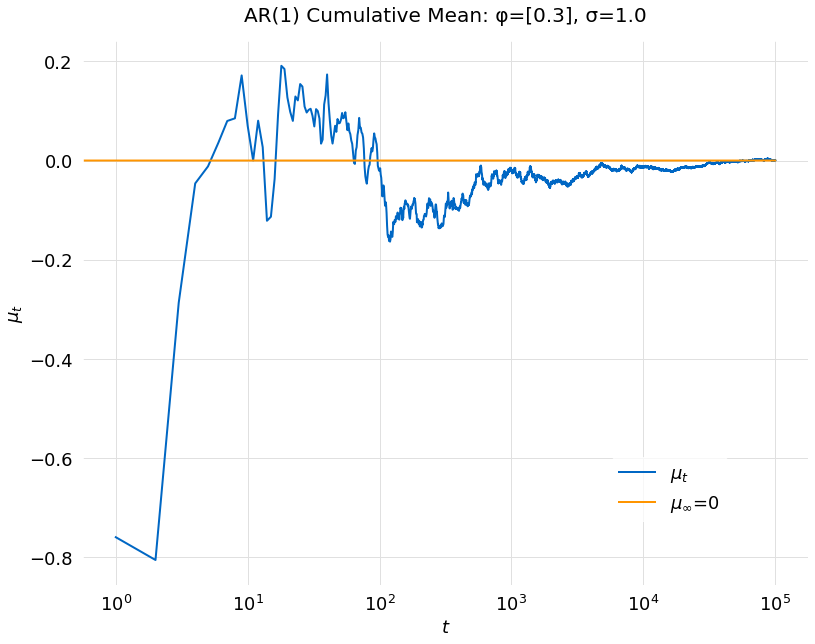

In [8]:
φ = 0.3
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

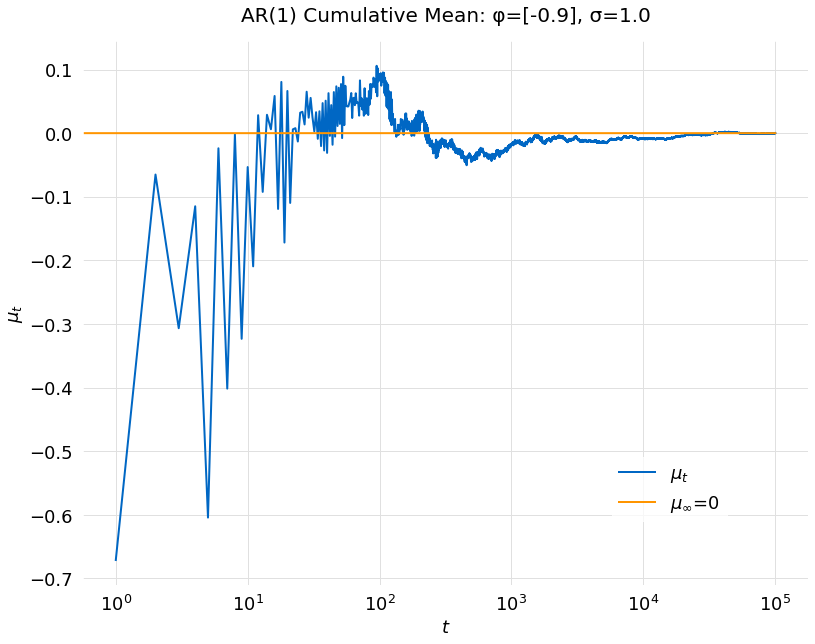

In [9]:
φ = -0.9
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

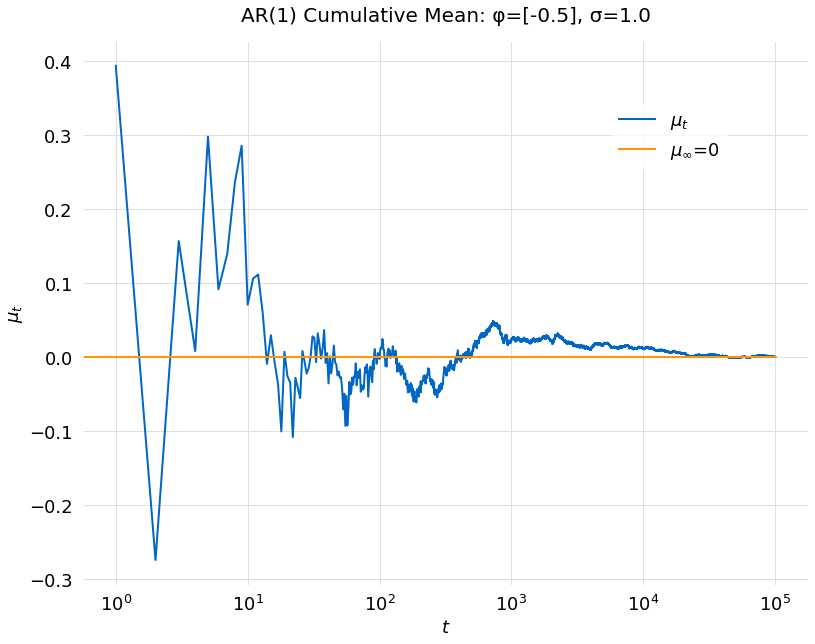

In [10]:
φ = -0.5
cumu_mean_plot(φ, σ, nsample)

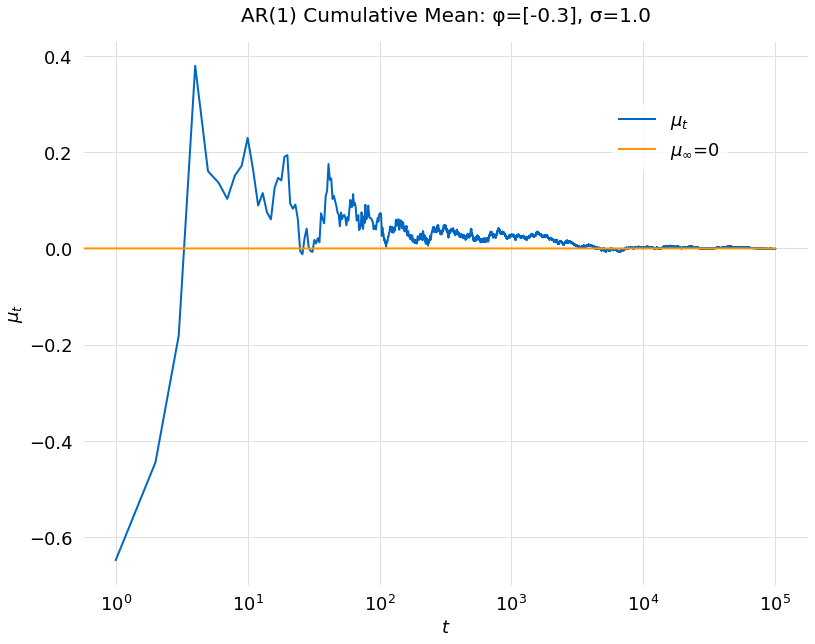

In [11]:
φ = -0.3
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

## Standard Deviation

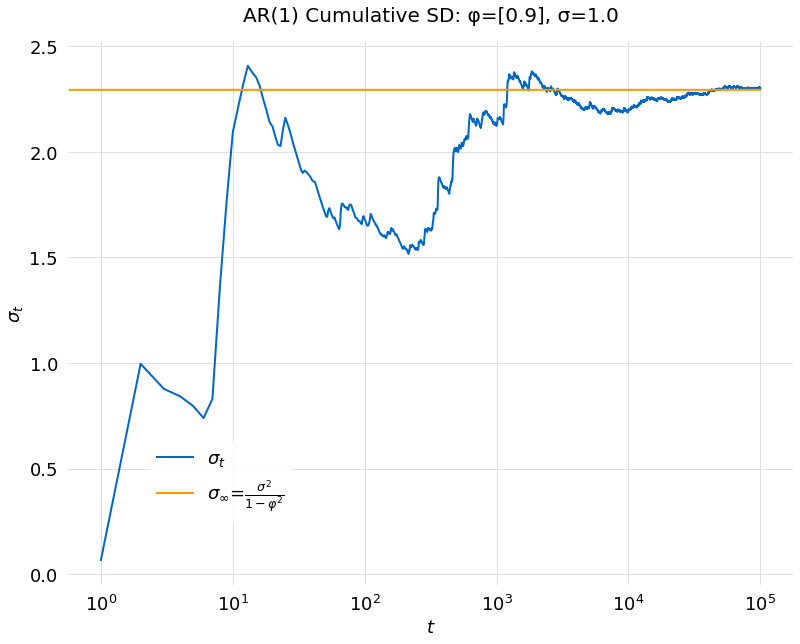

In [12]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

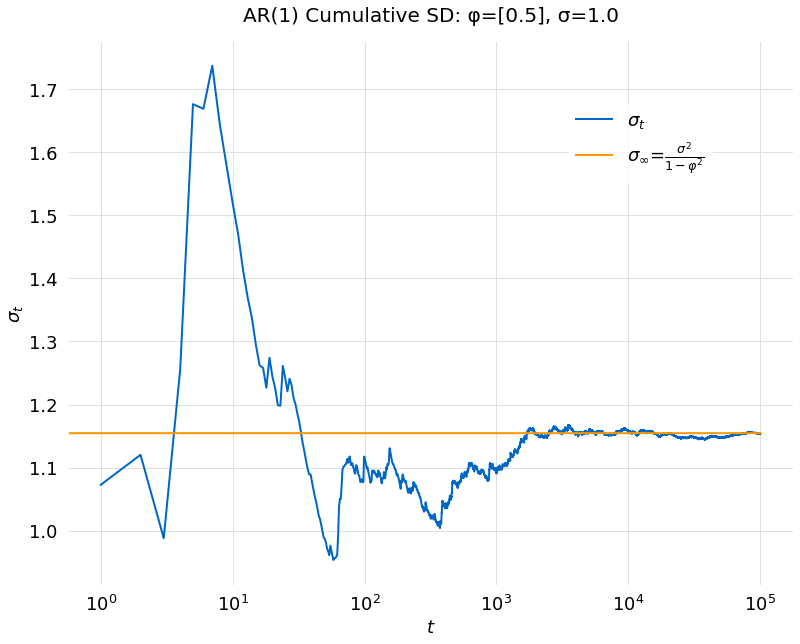

In [13]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

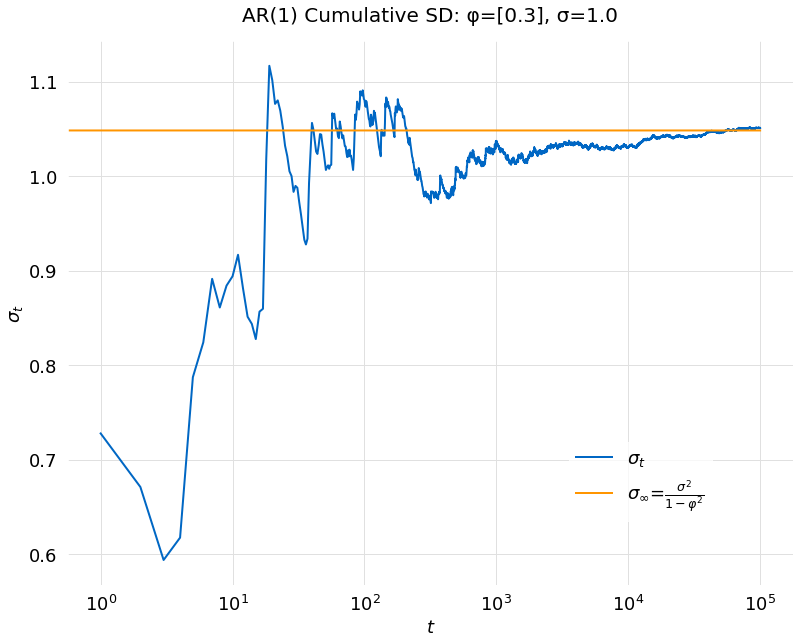

In [14]:
φ = 0.3
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

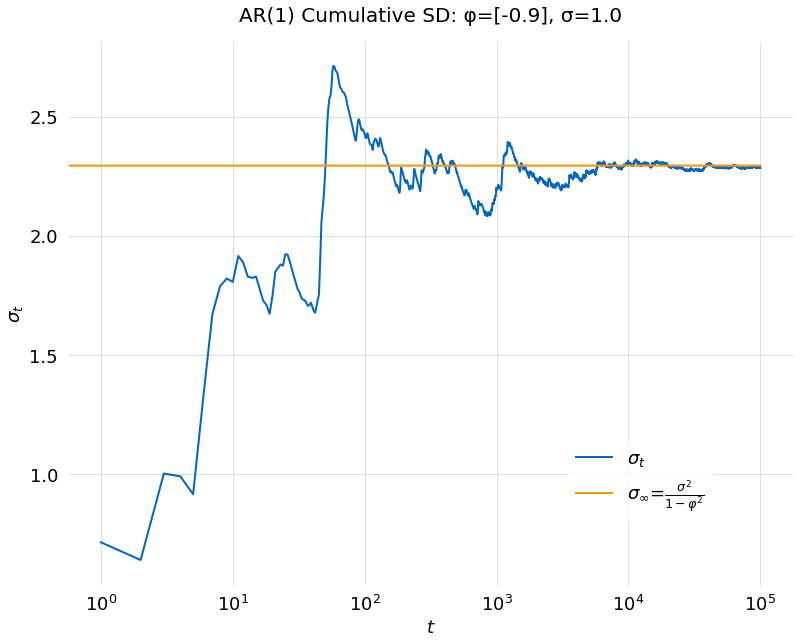

In [15]:
φ = -0.9
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

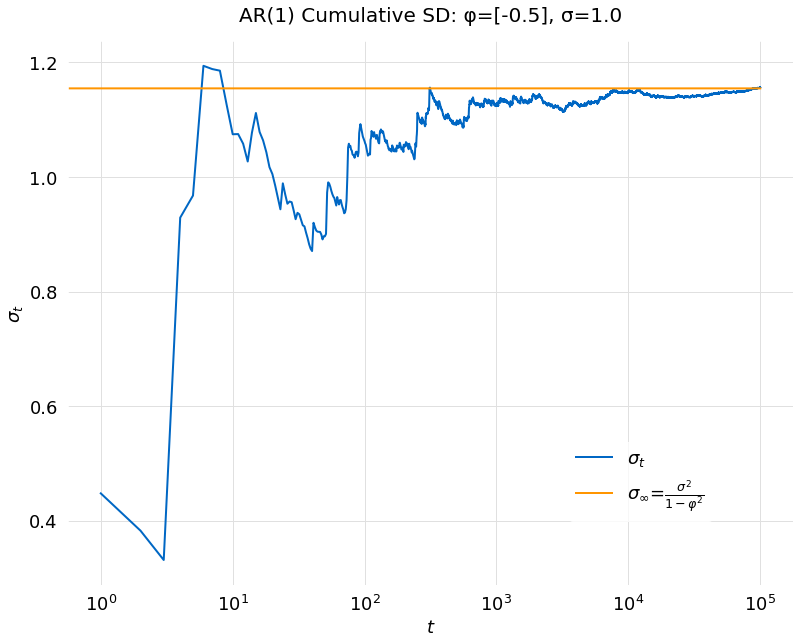

In [16]:
φ = -0.5
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

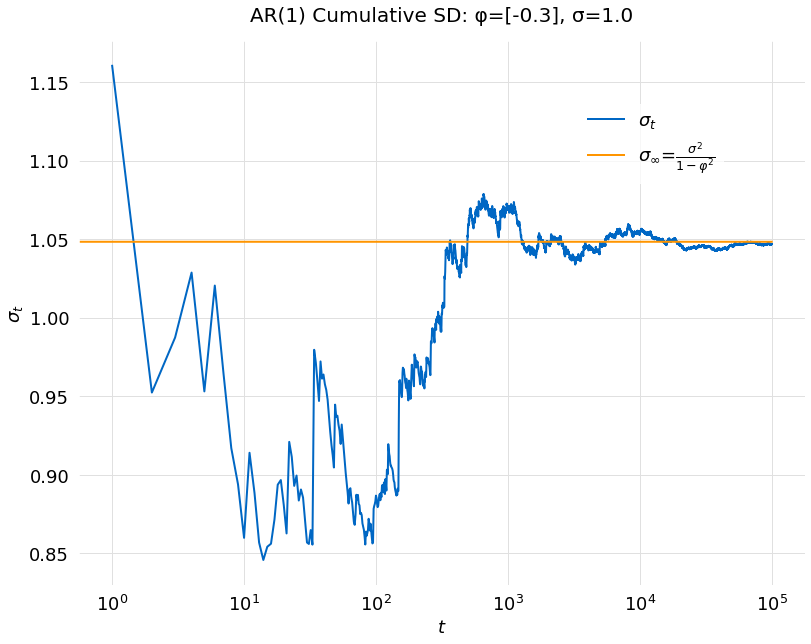

In [17]:
φ = -0.3
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

## Autocorrelation

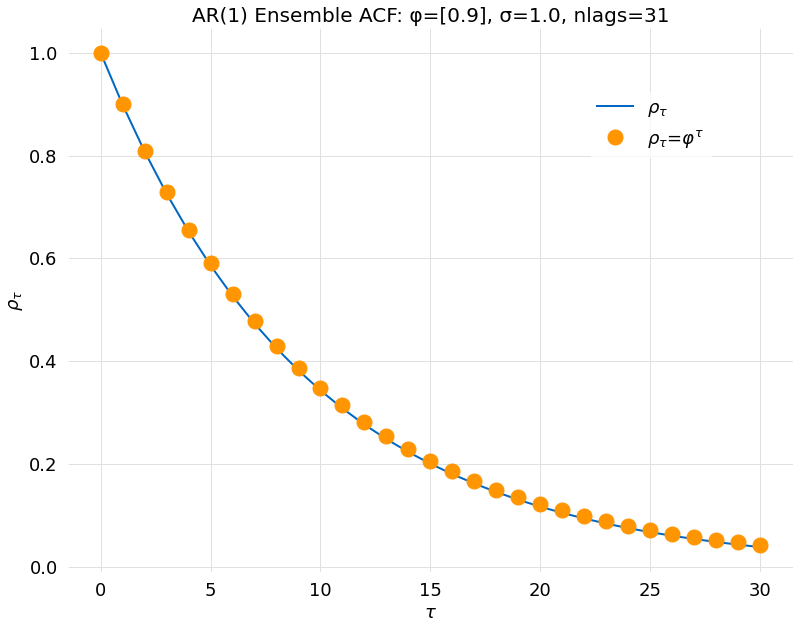

In [18]:
φ = 0.9
nlags = 31
nsample = 5000
nsim = 500
ac_plot(φ, σ, nsample, nsim, nlags)

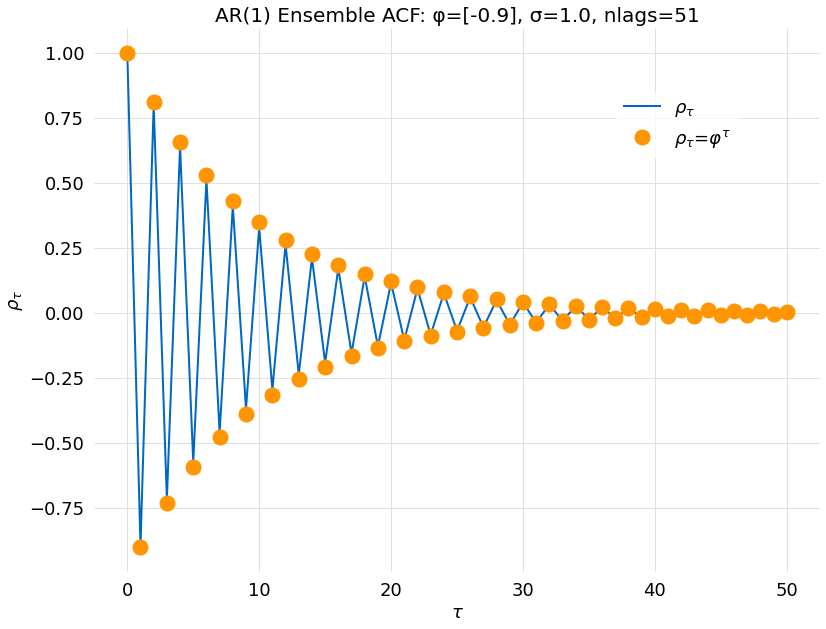

In [19]:
φ = -0.9
nlags = 51
nsample = 500
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)

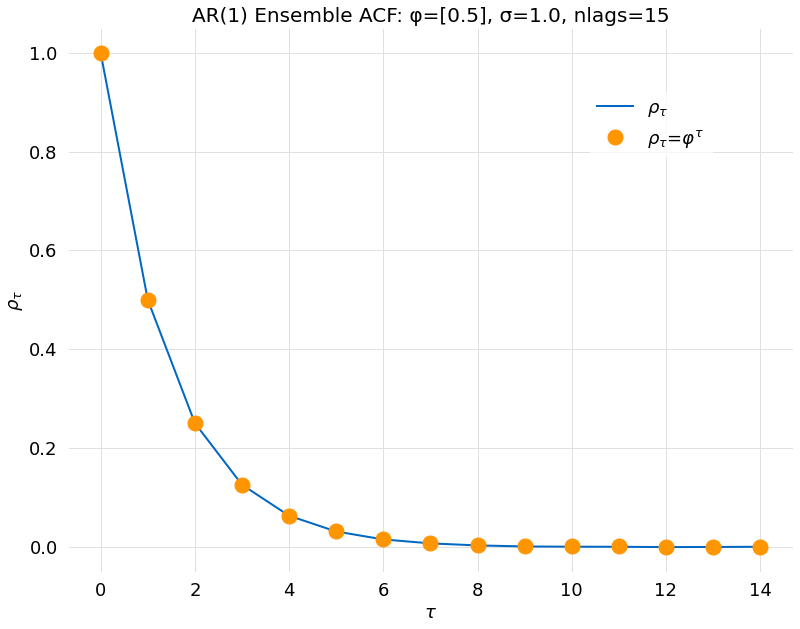

In [20]:
φ = 0.5
nlags = 15
nsample = 5000
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)

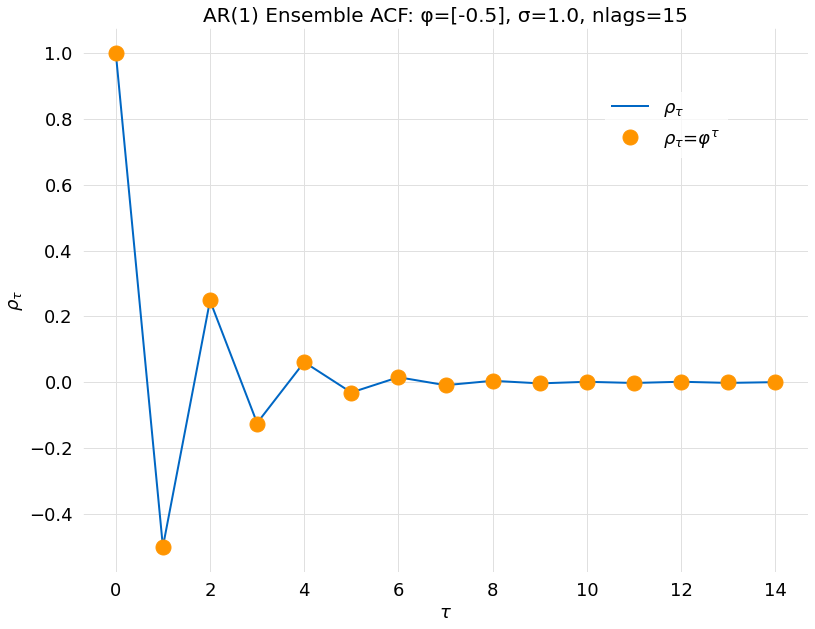

In [21]:
φ = -0.5
nlags = 15
nsample = 5000
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)

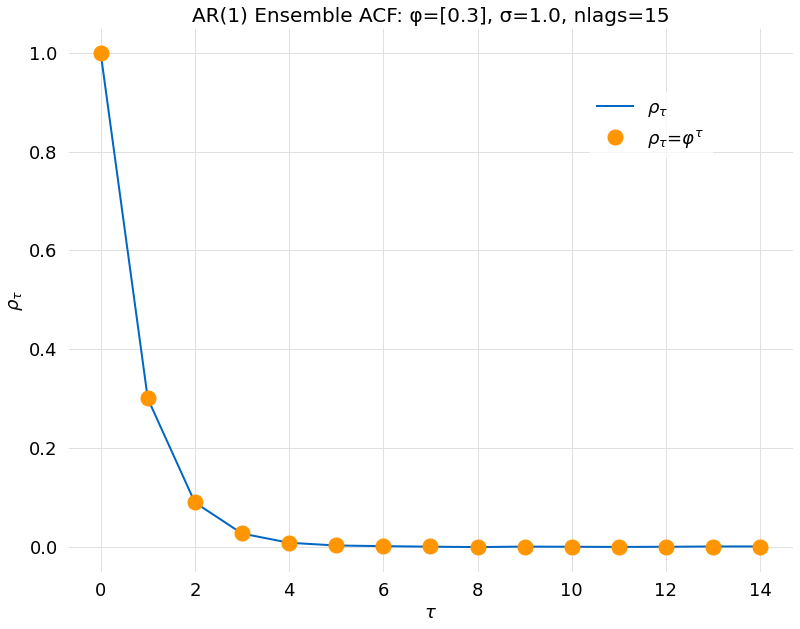

In [22]:
φ = 0.3
nsample = 5000
nsim = 1000
nlags = 15
ac_plot(φ, σ, nsample, nsim, nlags)

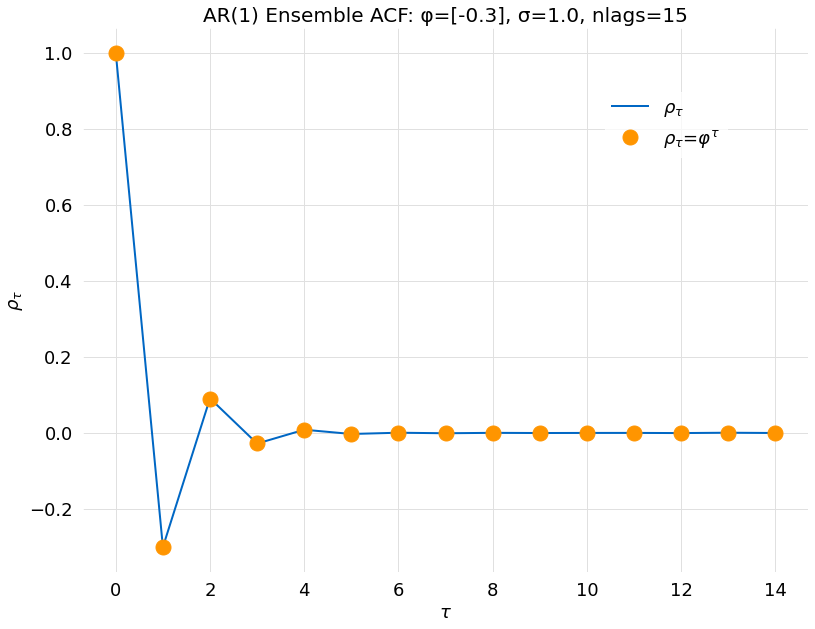

In [23]:
φ = -0.3
nlags = 15
nsample = 5000
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)